In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [3, 3]
output_layer = [1]

data = np.arange(1, 50, 0.5) * np.random.standard_normal(98)
feature_data = data[:-1]
target_data = data[1:]

n_epochs = 250
learning_rate = 0.001

In [3]:
bnn_linear = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn_linear.generate_m()
bnn_linear.generate_v()
bnn_linear.train(n_epochs)

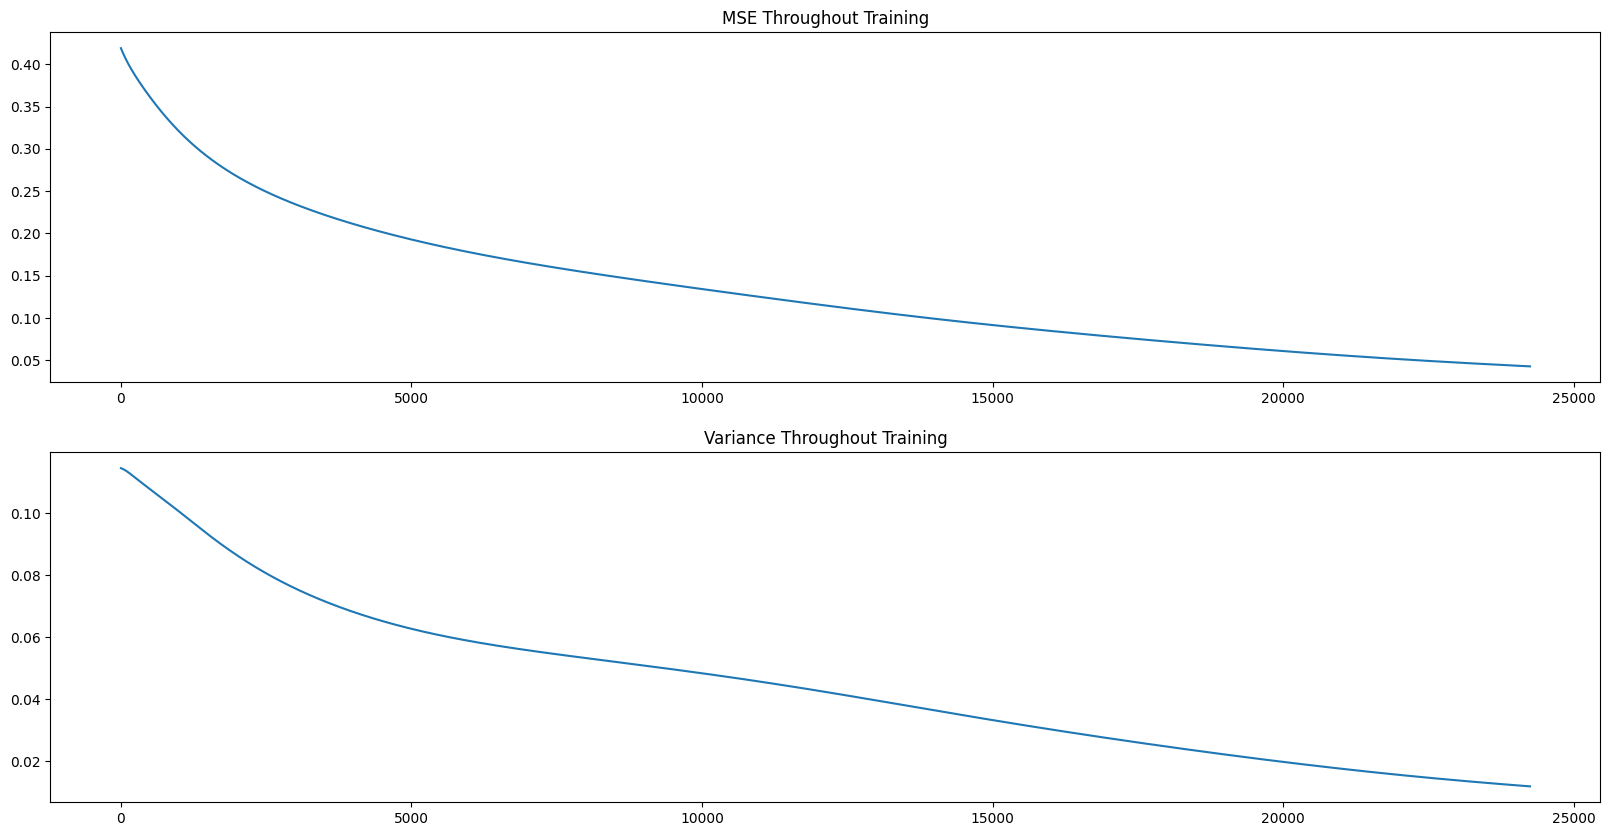

In [4]:
bnn_linear.visualize_performance()

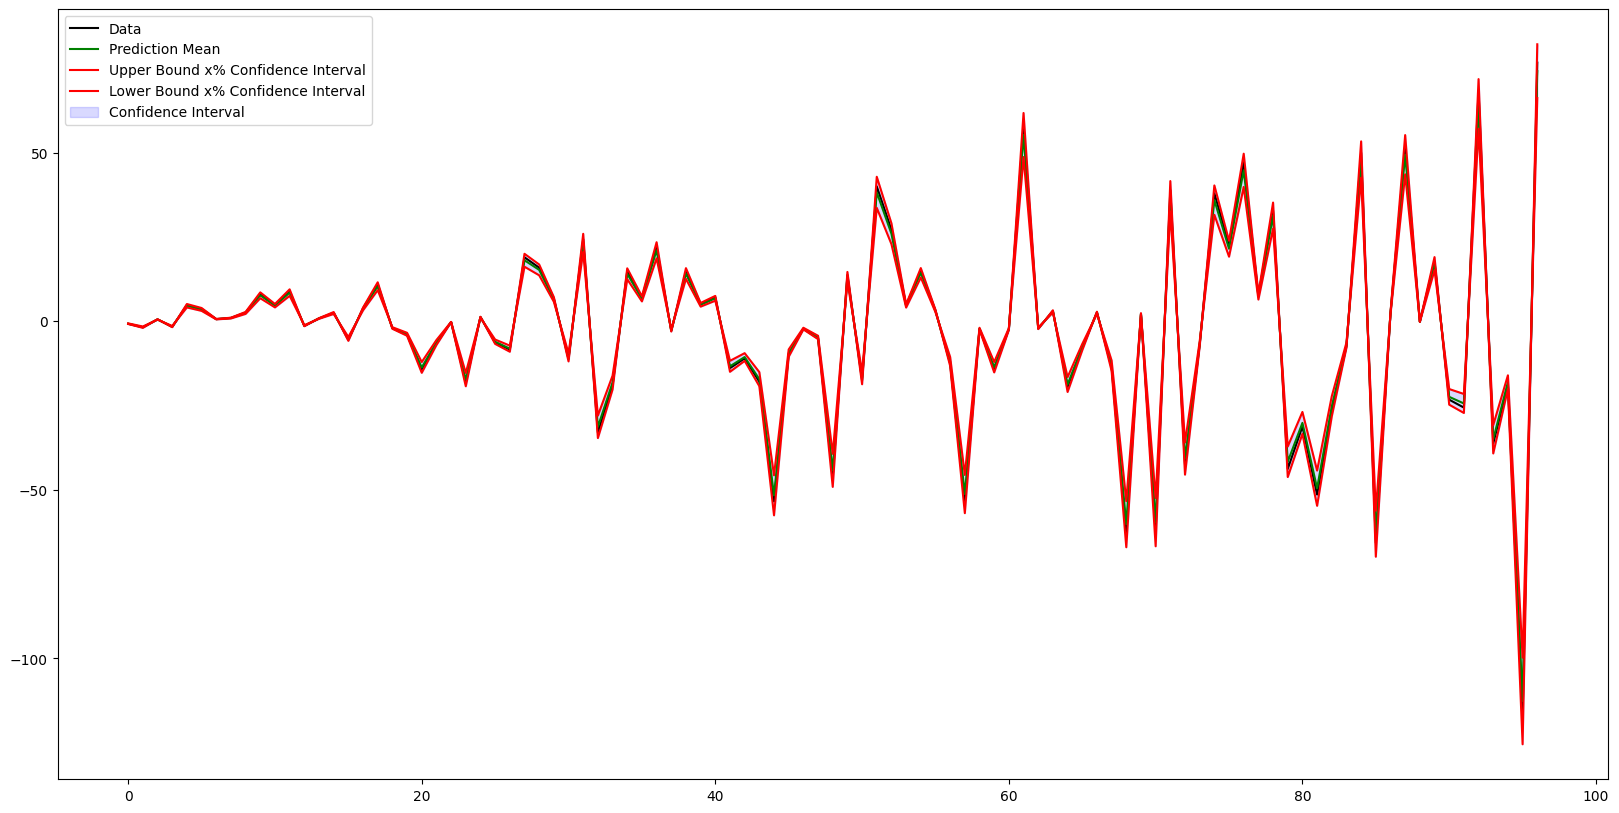

In [5]:
bnn_linear.predict()
bnn_linear.visualize_predictions()

# Model Performance On Sinusoidal Data

In [6]:
input_layer = [1]
hidden_layers = [16, 8, 4]
output_layer = [1]

data = np.sin(np.arange(1, 50, 0.5)) * np.random.standard_normal(98)
feature_data = data[:-1]
target_data = data[1:]

n_epochs = 150
learning_rate = 0.001

In [ ]:
bnn_sinusoidal = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn_sinusoidal.generate_m()
bnn_sinusoidal.generate_v()
bnn_sinusoidal.train(250)

In [ ]:
bnn_sinusoidal.visualize_performance()

In [ ]:
bnn_sinusoidal.predict()
bnn_sinusoidal.visualize_predictions()